<a href="https://colab.research.google.com/github/rgaguiar/dados-publicos/blob/master/CotaParlamentar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Descritiva: Despesas pela Cota de Exercício da Atividade Palamentar

A Cota para o Exercício da Atividade Parlamentar é uma cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar. O valor máximo mensal da cota depende da unidade da federação que o deputado representa. Essa variação ocorre por causa das passagens aéreas e está relacionada ao valor do trecho entre Brasília e o Estado que o deputado representa. Este é o [link](https://www2.camara.leg.br/transparencia/acesso-a-informacao/copy_of_perguntas-frequentes/cota-para-o-exercicio-da-atividade-parlamentar) do site da Câmara dos Deputados.

# Obtenção dos dados

> Esse dataset foi retirado do [site](https://dadosabertos.camara.leg.br/swagger/api.html#staticfile) dos dados abertos da **Câmara dos Deputados**. Os arquivos são separados por ano de ocorrência da despesa. O conjunto de dados possui informações consolidadas por descrição da despesa de todo período de 2021, como também por valor da despesa, valor restituído, dentre outras informações.

**Período de exercício dos dados: Ano de 2021**

In [ ]:
#!pip install plotnine --user

**Importar os dados**  
> Nesta etapa inicial importaremos o dataset mencionado anteriormente e as bibliotecas que iremos utilizar.

In [ ]:
# importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')
%matplotlib inline
%pylab inline

from datetime import datetime
from plotnine import ggplot, aes, geom_line

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

pd.set_option('display.float_format', '{:.4f}'.format)

# importando o dataset das despesas parlamentares
df = pd.read_csv("Ano-2021.csv", sep = ';', decimal=',')

Populating the interactive namespace from numpy and matplotlib


## Análise inicial dos dados

Nessa etapa vamos visualizar a estrutura da nossa base de dados, tipo de informação e presença de valores ausentes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211335 entries, 0 to 211334
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          211335 non-null  object 
 1   cpf                        210477 non-null  float64
 2   ideCadastro                210477 non-null  float64
 3   nuCarteiraParlamentar      210477 non-null  float64
 4   nuLegislatura              211335 non-null  int64  
 5   sgUF                       210477 non-null  object 
 6   sgPartido                  210477 non-null  object 
 7   codLegislatura             211335 non-null  int64  
 8   numSubCota                 211335 non-null  int64  
 9   txtDescricao               211335 non-null  object 
 10  numEspecificacaoSubCota    211335 non-null  int64  
 11  txtDescricaoEspecificacao  54725 non-null   object 
 12  txtFornecedor              211335 non-null  object 
 13  txtCNPJCPF                 17

Esse dataset que baixamos possui 211.335 entradas e 31 variáveis. Tendo em vista as informações acima, vamos remover algumas colunas pois não irão agregar valor na nossa análise.  

Vamos continuar apenas com os seguintes atributos: 
* txNomeParlamentar  
* sgUF  
* sgPartido  
* txtDescricao  
* txtFornecedor  
* datEmissao  
* vlrDocumento  
* vlrLiquido  
* numMes  
* numAno  
* vlrRestituicao  

<div class="alert alert-block alert-warning">
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes, por isso, sempre devemos verificar a quantidade de valores ausentes presentes em nosso dataset.
</div>

Nessa etapa vamos fazer a seleção dos atributos que permaneceram na análise.

In [ ]:
# selecionando os atributos que irão permancer na nossa análise
dfselect = df.loc[:,['txNomeParlamentar', 'sgUF', 'sgPartido', 'txtDescricao', 'txtFornecedor', 'datEmissao', 'vlrDocumento', 'vlrLiquido', 'numMes', 'numAno', 'vlrRestituicao']]

In [ ]:
# verificando as primeira linhas do nosso novo dataset
dfselect.head()

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,txtFornecedor,datEmissao,vlrDocumento,vlrLiquido,numMes,numAno,vlrRestituicao
0,LIDERANÇA DO AVANTE,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,BAR E RESTAURANTE TIA ZELIA LTDA ME,2021-10-27T00:00:00,526,526,10,2021,NaN
1,LIDERANÇA DO CIDADANIA,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,2021-03-04T00:00:00,999.96,999.96,3,2021,NaN
2,LIDERANÇA DO CIDADANIA,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,2021-03-11T00:00:00,999.96,999.96,3,2021,NaN
3,LIDERANÇA DO CIDADANIA,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,2021-03-17T00:00:00,999.96,999.96,3,2021,NaN
4,LIDERANÇA DO CIDADANIA,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,2021-04-12T00:00:00,999.96,999.96,4,2021,NaN


Esses são os atributos que abordaremos até o final da análise.

## Preparação dos dados (Data Wrangling)

Vamos verificar a estrutura dos dados novamente e corrigir o `Dtype` das variáveis, caso haja necessidade.

In [ ]:
dfselect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211335 entries, 0 to 211334
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   txNomeParlamentar  211335 non-null  object
 1   sgUF               210477 non-null  object
 2   sgPartido          210477 non-null  object
 3   txtDescricao       211335 non-null  object
 4   txtFornecedor      211335 non-null  object
 5   datEmissao         205200 non-null  object
 6   vlrDocumento       211335 non-null  object
 7   vlrLiquido         211335 non-null  object
 8   numMes             211335 non-null  int64 
 9   numAno             211335 non-null  int64 
 10  vlrRestituicao     46 non-null      object
dtypes: int64(2), object(9)
memory usage: 17.7+ MB


Aplicando a correção do `Dtype` das colunas datEmissao para data e vlrDocumento, vlrLiquido, vlrRestituicao para float.

### Tratamento dos Dtype

Como vimos anteriormente, campos que deveriam estar em formato numérico estão no formato `objetc`. Isso significa que devemos fazer um tratamento no `dtype` da variável para transformar em formato `float`.

In [ ]:
# transformando os dados desses atributos em float
dfselect["vlrDocumento"] = dfselect["vlrDocumento"].astype(float) 
dfselect["vlrLiquido"] = dfselect["vlrLiquido"].astype(float)
dfselect["vlrRestituicao"] = dfselect["vlrRestituicao"].astype(float)

In [ ]:
# transformando string-date em date
dfselect["datEmissao"] = pd.to_datetime(dfselect["datEmissao"])

In [ ]:
dfselect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211335 entries, 0 to 211334
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   txNomeParlamentar  211335 non-null  object        
 1   sgUF               210477 non-null  object        
 2   sgPartido          210477 non-null  object        
 3   txtDescricao       211335 non-null  object        
 4   txtFornecedor      211335 non-null  object        
 5   datEmissao         205200 non-null  datetime64[ns]
 6   vlrDocumento       211335 non-null  float64       
 7   vlrLiquido         211335 non-null  float64       
 8   numMes             211335 non-null  int64         
 9   numAno             211335 non-null  int64         
 10  vlrRestituicao     46 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 17.7+ MB


Agora os `Dtype` dos dados estão devidamente adequados ao seu atributo.

### Verificando a distribuição dos dados ausentes

In [ ]:
(dfselect.isnull().sum()/dfselect.shape[0]).sort_values(ascending=False)

vlrRestituicao      0.9998
datEmissao          0.0290
sgUF                0.0041
sgPartido           0.0041
txNomeParlamentar   0.0000
txtDescricao        0.0000
txtFornecedor       0.0000
vlrDocumento        0.0000
vlrLiquido          0.0000
numMes              0.0000
numAno              0.0000
dtype: float64

<AxesSubplot:>

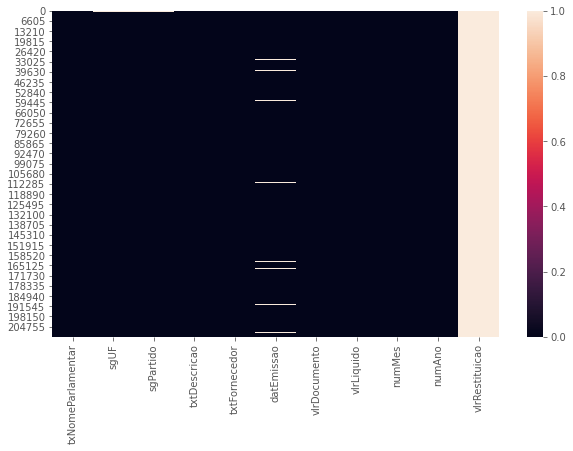

In [ ]:
plt.figure( figsize=(10,6) )
sns.heatmap(dfselect.isnull())

Nessa etapa vamos ter que tomar algumas decisões.  
1. O atributo `vlrRestituição` tem **99,9%** de valores nulos. Como não sabemos se essa informação está realmente correta, vamos optar por remover esse atributo na nossa análise.
2. Atribuir uma categoria (não informado) para os campos `sgPartido` e `sgUF`.

In [ ]:
# removendo o atributo vlrRestituição
dfselect.drop('vlrRestituicao', axis=1, inplace=True)

In [ ]:
#Atribuir uma categoria (não informado) para os campos sgPartido e sgUF
dfselect["sgPartido"].fillna("NAO INFORMADO", inplace=True)
dfselect["sgUF"].fillna("NAO INFORMADO", inplace=True)

In [ ]:
dfselect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211335 entries, 0 to 211334
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   txNomeParlamentar  211335 non-null  object        
 1   sgUF               211335 non-null  object        
 2   sgPartido          211335 non-null  object        
 3   txtDescricao       211335 non-null  object        
 4   txtFornecedor      211335 non-null  object        
 5   datEmissao         205200 non-null  datetime64[ns]
 6   vlrDocumento       211335 non-null  float64       
 7   vlrLiquido         211335 non-null  float64       
 8   numMes             211335 non-null  int64         
 9   numAno             211335 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 16.1+ MB


In [ ]:
dfselect.describe()

,vlrDocumento,vlrLiquido,numMes,numAno
count,211335.0000,211335.0000,211335.0000,211335.0000
mean,994.9233,989.0323,6.8037,2021.0000
std,2443.4079,2435.5647,3.3557,0.0000
min,-3968.0200,-6666.0000,1.0000,2021.0000
25%,94.0000,91.0000,4.0000,2021.0000
50%,254.5700,250.1600,7.0000,2021.0000
75%,977.2600,972.0950,10.0000,2021.0000
max,96600.0000,96600.0000,12.0000,2021.0000


* Vamos remover os valores negativos da variável `vlrLiquido` que é a variável que vamos trabalhar. Não sabemos o que levou a esses resultados. 
* A mediana do valor líquido das despesas é R$ 250,16. 
* Outro resultado interessante é a diferença entre o valor máximo e o terceiro quartil. 

In [ ]:
dfselect = dfselect[dfselect["vlrLiquido"]>= 0]

Para finalizar, o nosso dataset final terá a seguinte estrutura.

In [ ]:
dfselect.head()

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,txtFornecedor,datEmissao,vlrDocumento,vlrLiquido,numMes,numAno
0,LIDERANÇA DO AVANTE,NAO INFORMADO,NAO INFORMADO,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,BAR E RESTAURANTE TIA ZELIA LTDA ME,2021-10-27,526.0000,526.0000,10,2021
1,LIDERANÇA DO CIDADANIA,NAO INFORMADO,NAO INFORMADO,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,2021-03-04,999.9600,999.9600,3,2021
2,LIDERANÇA DO CIDADANIA,NAO INFORMADO,NAO INFORMADO,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,2021-03-11,999.9600,999.9600,3,2021
3,LIDERANÇA DO CIDADANIA,NAO INFORMADO,NAO INFORMADO,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,2021-03-17,999.9600,999.9600,3,2021
4,LIDERANÇA DO CIDADANIA,NAO INFORMADO,NAO INFORMADO,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,2021-04-12,999.9600,999.9600,4,2021


# Análise Exploratória

> Depois de uma preparação e tratamento nos dados do nosso dataset, podemos partir para os objetivos desse projeto e começar a explorar os dados.

O objetivo dessa etapa e das que estão por vim é analisar e extrair informações sobre as **despesas pela cota de exercício da atividade parlamentar** com base no nosso dataset.

### Quais são os partidos cobertos pela cota de exercício parlamentar?

In [ ]:
dfPartido = dfselect.groupby('sgPartido')['vlrDocumento', 'vlrLiquido'].sum().sort_values(by=['vlrDocumento', 'vlrLiquido'], ascending=False).reset_index()
# numero de parlamentares distintos por partido
dfParlamentar = dfselect.groupby('sgPartido')['txNomeParlamentar'].nunique().sort_values(ascending=False).reset_index()

# criando novo dataframe resumido por partidos e renomeando as colunas
dfPatParl = dfPartido.merge(dfParlamentar, on='sgPartido').rename({'sgPartido': 'Partido', 'vlrDocumento': 'Valor Documento' ,\
                                                                   'vlrLiquido': 'Valor Líquido', 'txNomeParlamentar': 'Qtde Parlamentar'}, axis = 1)
# criando duas novas colunas
dfPatParl['Perc VlrLíquido'] = (dfPatParl['Valor Líquido']/dfPatParl['Valor Líquido'].sum()).round(2)*100
dfPatParl['Media Parlamentar'] = (dfPatParl['Valor Líquido']/dfPatParl['Qtde Parlamentar']).round(2)
#
#dfPatParl.nlargest(5, 'Valor Líquido')

In [ ]:
# Mostrar os partidos envolvidos
print(f'Os partidos cobertos pela cota de exercício da atividades parlamentar em 2021 foram: {dfselect["sgPartido"].unique()}')

Os partidos cobertos pela cota de exercício da atividades parlamentar em 2021 foram: ['NAO INFORMADO' 'UNIÃO' 'PP' 'PV' 'PSB' 'PT' 'REPUBLICANOS' 'PDT'
 'CIDADANIA' 'PSOL' 'MDB' 'PCdoB' 'PSD' 'PL' 'PROS' 'PSDB' 'PSC' 'S.PART.'
 'PODE' 'PTB' 'SOLIDARIEDADE' 'NOVO' 'REDE' 'AVANTE' 'PATRIOTA']


In [ ]:
# total partidos envolvidos
print(f'Ao total foram: {len(dfselect["sgPartido"].unique())} partidos envolvidos')

Ao total foram: 25 partidos envolvidos


Lembrando que temos os `NÃO INFORMADOS` e os sem partidos (`S.PART.`) na conta.

### Qual foi o custo das despesas líquidas no período?

In [ ]:
print(f' Valor líquido total das despesas no exercício: {dfPatParl["Valor Líquido"].sum().round(2)}')

 Valor líquido total das despesas no exercício: 210696388.06


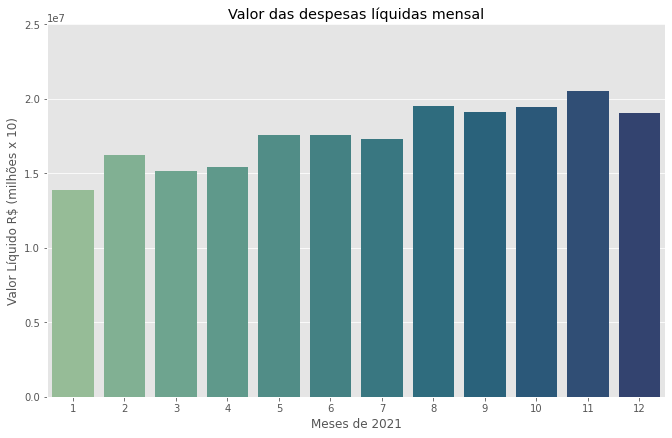

In [ ]:
# despesas líquidas mensal
dfDespMes = dfselect.groupby('numMes')['vlrLiquido'].sum().reset_index()

sns.catplot(x="numMes", y="vlrLiquido", kind='bar', palette=("crest"), data=dfDespMes)
plt.xlabel("Meses de 2021")
plt.ylabel("Valor Líquido R$ (milhões x 10)")
plt.title("Valor das despesas líquidas mensal")
plt.ylim(0, 22000000) # definir limite do eixo
plt.yticks(range(0, 30000000, 5000000)) # alterar escala do eixo
plt.gcf().set_size_inches(10, 6)

Gastos com despesas de cotas parlamentares por mês.

* O custo total no período foi de R\$ 210.696.388,06 com cotas parlamentares.  
* O segundo semestre foi o período de maior gasto.  
* A média de gasto mensal foi de R\$ 17.55.8032,33.  
* Outubro foi o mês com o maior gasto, ultrapassando os R\$ 20.000.000 no mês. 

### Qual foi o custo de cada partido nas despesas do exercício de 2021?

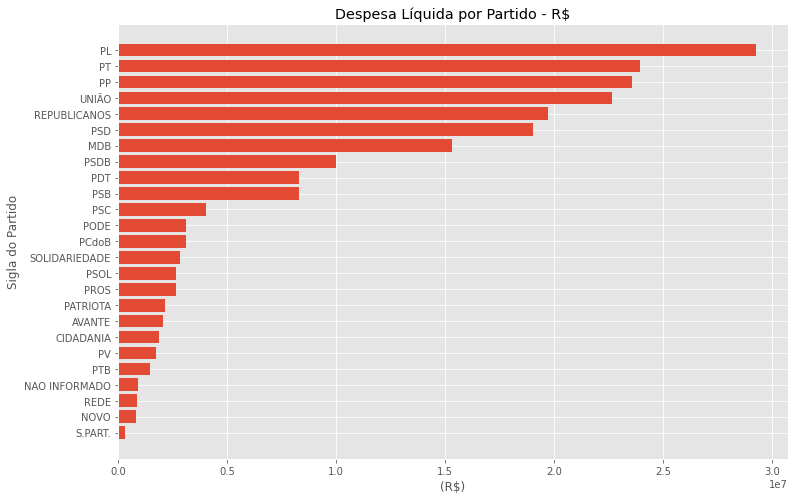

In [ ]:
# Ordenando a tabela
dfOrder = dfPatParl.sort_values(by=['Valor Líquido'], ascending=True)

plt.figure( figsize=(12,8) )
plt.barh(y=dfOrder["Partido"], width=dfOrder["Valor Líquido"])
plt.xlabel("(R$)")
plt.ylabel("Sigla do Partido")
plt.title("Despesa Líquida por Partido - R$")
plt.show()

O Partido Liberal **(PL)** registrou o maior valor líquido com despesas de cotas parlamentares, seguido pelo Partido dos Trabalhadores **(PT)** e o Partido Progressista **(PP)**.  Os 3 partidos que registraram menos despesas com cota parlamentar foram **REDE**, **NOVO** e Sem Partidos **(S.PART)**

Aqui temos os 5 partidos com **maior valor** de despesa da cota no exercício de 2021.

In [ ]:
dfPatParl.nlargest(5, 'Valor Líquido')

,Partido,Valor Documento,Valor Líquido,Qtde Parlamentar,Perc VlrLíquido,Media Parlamentar
0,PL,29389584.2600,29246137.7400,82,14.0000,356660.2200
1,PT,24035804.2700,23934354.5200,58,11.0000,412661.2800
2,PP,23732691.8900,23555512.7600,59,11.0000,399245.9800
3,UNIÃO,22750300.6500,22630888.8900,55,11.0000,411470.7100
4,REPUBLICANOS,19877822.6500,19737084.8000,49,9.0000,402797.6500


Aqui temos os 5 partidos com **menor valor** de despesa da cota no exercício de 2021.

In [ ]:
dfPatParl.nsmallest(5, 'Valor Líquido')

,Partido,Valor Documento,Valor Líquido,Qtde Parlamentar,Perc VlrLíquido,Media Parlamentar
24,S.PART.,321304.9500,320898.9900,1,0.0000,320898.9900
23,NOVO,860248.0100,833851.9600,8,0.0000,104231.5000
22,REDE,863697.6600,862863.8800,2,0.0000,431431.9400
21,NAO INFORMADO,933403.2900,928964.8200,18,0.0000,51609.1600
20,PTB,1466655.1600,1454306.8300,4,1.0000,363576.7100


Como podemos ver, alguns partidos possuem mais parlamentares que outros, logo, é normal que partidos maiores tenham custos maiores e partidos menores custos menores. Uma forma de avaliar de maneira justa é criar uma nova medida que padronize essa relação (vamos chamar essa nova medida de média parlamentar).  

Para se ter uma ideia da dimensão, temos o gráfico de dispersão abaixo:

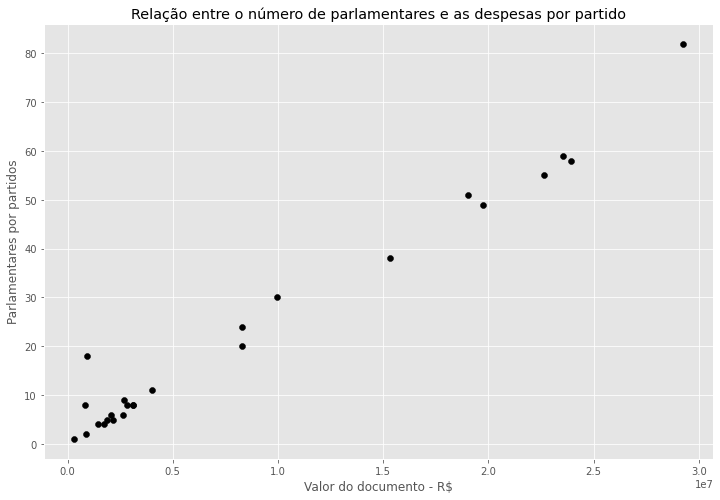

In [ ]:
# Pontos do Gráfico na côr Preta (c = 'k')
plt.figure( figsize=(12,8) )
plt.scatter(dfPatParl['Valor Líquido'], dfPatParl['Qtde Parlamentar'], c='k')
plt.title("Relação entre o número de parlamentares e as despesas por partido")
plt.xlabel("Valor do documento - R$")
plt.ylabel("Parlamentares por partidos")
plt.show()

Podemos ver uma relação linear positiva.

Então, vamos plotar o gráfico da média do valor do documento pelo número de parlamentares de cada partido. 

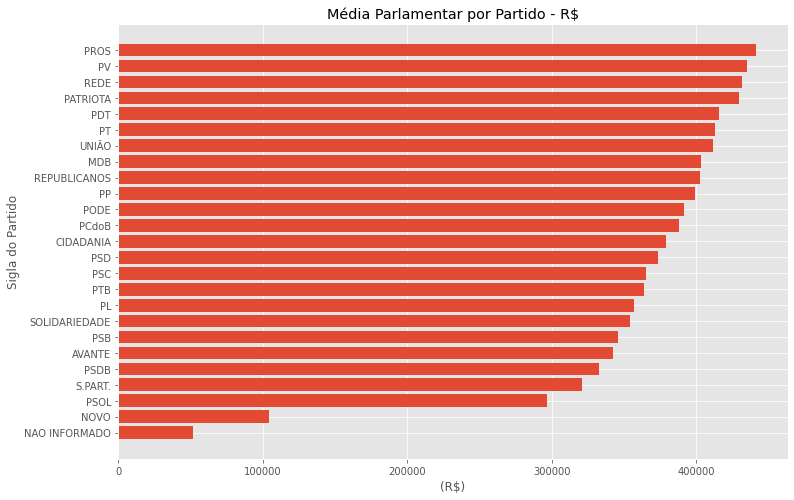

In [ ]:
# Ordenando a tabela
dfOrderPadron = dfPatParl.sort_values(by=['Media Parlamentar'], ascending=True)
# Criando barra horizontal
plt.figure( figsize=(12,8) )
plt.barh(y=dfOrderPadron["Partido"], width=dfOrderPadron["Media Parlamentar"])
plt.xlabel("(R$)")
plt.ylabel("Sigla do Partido")
plt.title("Média Parlamentar por Partido - R$")
#
plt.show()

Podemos perceber que agora o cenário mudou no topo. O partido REDE, que estava entre os 3 com menor valor de despesa líquida, agora está no top 5. O partido PL, que ocupava o topo nas despesas líquidas, agora está abaixo da mediana das despesas por parlamentar.

> Lembrando que nessa nova medida temos os valores líquidos das despesas dividido pelo número de parlamentares do seu partido.  


### Quais foram as principais despesas das cotas parlamentares?

Agora vamos analisar o tipo da despesa.

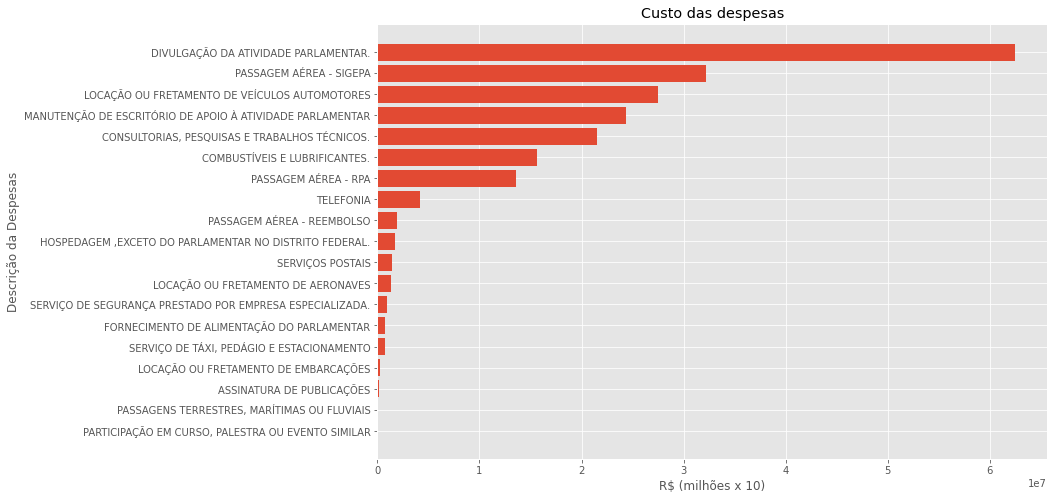

In [ ]:
dfDespesa = dfselect.groupby('txtDescricao')['vlrLiquido'].sum().sort_values(ascending=False).reset_index()
# Ordenando a tabela
dfDespesa = dfDespesa.sort_values(by=['vlrLiquido'], ascending=True)
#from matplotlib.ticker import ScalarFormatter
#matplotlib.rcParams["axes.formatter.useoffset"] = False

# Criando barra horizontal
plt.figure(figsize=(12,8))
plt.barh(y=dfDespesa["txtDescricao"], width=dfDespesa["vlrLiquido"])
plt.title("Custo das despesas")
plt.xlabel("R$ (milhões x 10)")
plt.ylabel("Descrição da Despesas")
#
plt.show()

A principal despesa com cotas parlamentares é relacionada a **DIVULGAÇÃO DE ATIVIDADES PARLAMENTAR**, com um total de mais de R\$60.000.000 no período, seguido por passagens aéreas e locação ou fretamento de veículos automotores.

### Conclusões

O que se pode concluir é que o Brasil possui uma despesa muito alta com exercício de cotas parlamentares e que elas estão claramente ligadas a quantidade de cadeiras que o partido ocupa na câmara de deputados.

Na análise foram identificados os seguintes pontos:
* Que o segundo semestre é o semestre com maior despesa, principalmente no mês de outubro.  
* No acumulado, os cinco partidos com maior despesas são: PL, PT, PP, UNIÃO e REPUBLICANOS (Representando 56% das despesas).  
* Usando o total das despesas pelo número de parlamentares, os 5 partidos com maior custo por parlamentar são: PROS, PV, REDE, PATRIOTA e PDT.  
* A principal despesa na atividade parlamentar é referente a DIVULGAÇÃO DE ATIVIDADES PARLAMENTAR. 

Lembra-se que essa análise foi baseada em uma base de dados disponibilizada pela Câmera dos Deputados do período de 2021.